In [6]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R
from scipy import linalg
from scipy.stats import multivariate_normal
from matplotlib.widgets import Slider, Button, RadioButtons
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import animation


numn=100
numomega=100
xval = np.array(range(1,numomega+1))
omega = np.zeros((numomega,numn)) # 100 sample points, each has an error value for one of numn n_t values
factor = np.array([np.exp(-x/numomega) for x in range(numomega)])

for i in range(omega.shape[0]):
    omega[i,0]=np.random.rand()
omega[:,0]=-np.sort(-omega[:,0])
for j in range(1,omega.shape[1]):
    omega[:,j] = omega[:,j-1]*factor


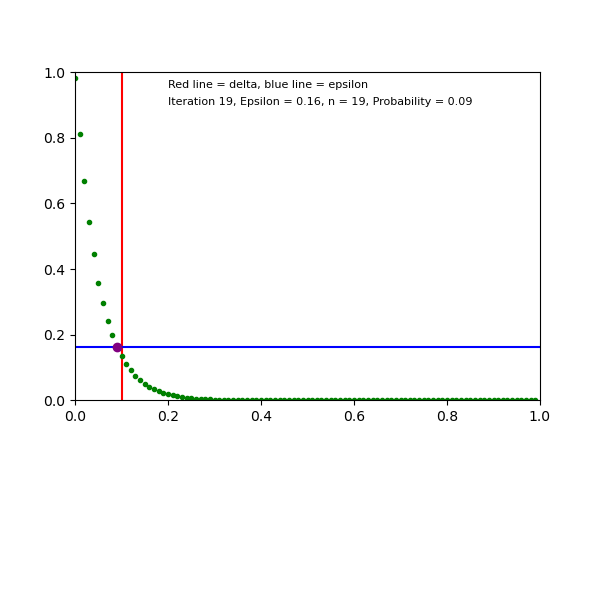

In [3]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter


numn=100
numomega=100
nstart = 3
epsilonstart = 0.4

xval = np.array(np.arange(0,1-1/(2*numomega),1/numomega))
omega = np.zeros((numomega,numn)) # 100 sample points, each has an error value for one of numn n_t values
factor = np.array([np.exp(-x/numomega) for x in range(numomega)])

for i in range(omega.shape[0]):
    omega[i,0]=np.random.rand() # for n=0
omega[:,0]=-np.sort(-omega[:,0])
for j in range(1,omega.shape[1]):
    omega[:,j] = omega[:,j-1]*factor # for larger n's


maxf=20
gridsize = (14, 2)
fig = plt.figure(num=1, clear=True, figsize=(6, 6))
axfig = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=10)
axfig.set_xlim(left=0,right=1)
axfig.set_ylim(bottom=0,top=1)
axfig.text(0.2, 0.95, "Red line = delta, blue line = epsilon", fontsize = 8)

dropep = True
n=nstart

axfig.plot([0.1,0.1],[0,1],marker='',color='red')
lepsilon, =axfig.plot([],[],marker='',color='blue')
l2, = axfig.plot([],[],marker='.', linestyle='none',color='g')
l3, = axfig.plot([],[],marker='o',color='purple')
tx1 = axfig.text(0.2, 0.9, "", fontsize = 8)

def animate(k):
    global n, dropep, epsilon
    if k==0:
        epsilon=epsilonstart
        n=nstart
        dropep = True
    if dropep:
        epsilon *= 0.8
        lepsilon.set_data([0,1],[epsilon,epsilon])
        l2.set_data(xval,omega[:,n])
        dropep = False
        wm=0
        for i in range(omega.shape[0]):
            wm = i
            if omega[i,n]<epsilon:
                break
        l3.set_data([wm/numomega],[omega[wm,n]])
        tx1.set_text("Iteration "+str(k)+", Epsilon = "+'{0:.2f}'.format(epsilon)+", n = "+str(n)+", Probability = "+'{0:.2f}'.format(wm/numomega))
    else:
        n = (n+1) % numomega
        l2.set_data(xval,omega[:,n])
        wm=0
        for i in range(omega.shape[0]):
            wm = i
            if omega[i,n]<epsilon:
                break
        l3.set_data([wm/numomega],[omega[wm,n]])
        tx1.set_text("Iteration "+str(k)+", Epsilon = "+'{0:.2f}'.format(epsilon)+", n = "+str(n)+", Probability = "+'{0:.2f}'.format(wm/numomega))
        if wm/numomega < 0.1:
            dropep = True
    return lepsilon, l2, l3

ani = FuncAnimation(fig, animate, frames=maxf,
                              interval=2000, blit=True)

ani.save("convergenceProb.gif", dpi=300, writer=PillowWriter(fps=0.5))

# plt.show()

In [4]:
ani.event_source.stop()

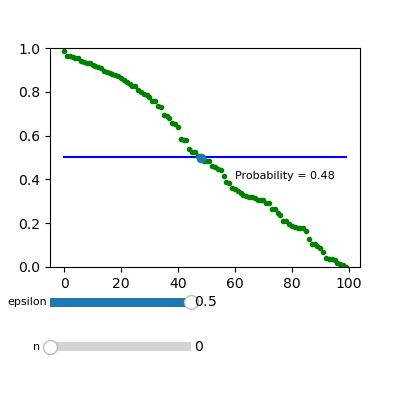

In [2]:
gridsize = (14, 2)
fig = plt.figure(figsize=(4, 4))
axfig = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=10)
axfig.set_ylim(bottom=0,top=1)

axslider1 = plt.subplot2grid(gridsize, (11, 0))
axslider2 = plt.subplot2grid(gridsize, (13, 0))

epsilon = 0.5
n=0
axfig.plot(np.ones(numomega)*epsilon,marker='',color='blue')
# Annotate with text + Arrow
myxy=(50, epsilon)
myxytext = (20,.9)

axfig.plot(omega[:,n],marker='.', linestyle='none',color='g')
wm=0
for i in range(omega.shape[0]):
    wm = i
    if omega[i,n]<epsilon:
        break
axfig.plot([wm],[omega[wm,n]],marker='o')
tx1 = axfig.text(60, 0.4, "Probability = "+str(wm/numomega), fontsize = 8)

# # sliders
se = Slider(axslider1, 'epsilon', 0, 0.5, valinit=epsilon, valstep=0.01)
se.label.set_size(8)
sn = Slider(axslider2, 'n  ', 0, numn-1, valinit=n, valstep=range(numn))
sn.label.set_size(8)

def update(val):
    epsilon = se.val
    n = int(sn.val)
    axfig.lines.pop()
    axfig.lines.pop()
    axfig.lines.pop()
    axfig.plot(np.ones(numomega)*epsilon,marker='',color='blue')
    axfig.plot(omega[:,n],marker='.', linestyle='none',color='g')
    wm=0
    for i in range(omega.shape[0]):
        wm = i
        if omega[i,n]<epsilon:
            break
    axfig.plot([wm],[omega[wm,n]],marker='o',color='purple')
    tx1.set_text("Probability = "+str(wm/numomega))

sn.on_changed(update)
se.on_changed(update)

plt.show()

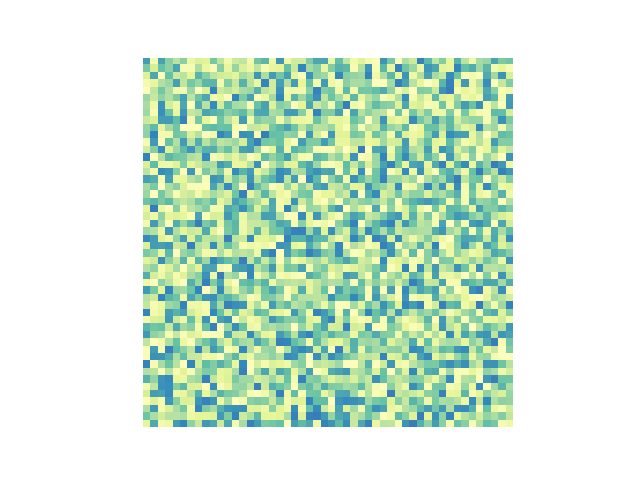

In [45]:
from matplotlib import animation
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
n = 50
a=np.random.rand(n,n)
offset = 25
im=plt.imshow(a,cmap='Spectral', interpolation='none',vmin = -1.2,
                             vmax = 1.2)
plt.axis(False)
maxf=1000

# animation function.  This is called sequentially
def animate(k):
  if k>maxf/2:
    k=maxf-k
  scale = 2+k/20
  a=np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      x=(j-offset)/scale
      y=(i-offset)/scale
      r=np.sqrt(x*x+y*y)
      if r==0:
        z=1
      else:
        z=np.sin(r)/r
      a[i,j] = z
  im.set_array(a)
  return [im]

ani = animation.FuncAnimation(fig, animate, frames=maxf,
                              interval=50, blit=True)

# HTML(ani.to_html5_video())

In [4]:
xval = np.array(np.arange(0,1-1/(2*numomega),1/numomega))


In [6]:
xval

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])